In [1]:
# see 20160525_CallableLoci_bed_release_5.ipynb for creation of CallableLoci results and
# 20160718_pilot_manuscript_accessibility_bedtools.ipynb for combining across samples

In [2]:
%run _standard_imports.ipynb
%run _shared_setup.ipynb
%run _plotting_setup.ipynb

python 3.4.5 |Anaconda 2.2.0 (64-bit)| (default, Jul  2 2016, 17:47:47) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
numpy 1.11.1
scipy 0.18.0
pandas 0.15.2
numexpr 2.3.1
pysam 0.9.1.4
pysamstats 0.24.3
petl 1.1.0
petlx 1.0.3
vcf 0.6.7
vcfnp 2.3.0.dev0
h5py 2.4.0
tables 3.1.1


In [14]:
accessibility_array_fn = "/nfs/team112_internal/rp7/data/pf3k/analysis/20160718_pilot_manuscript_accessibility/accessibility_array_2512_field.npy"
core_regions_fn = "/nfs/team112_internal/rp7/src/github/malariagen/pf-crosses/meta/regions-20130225.bed.gz"


In [4]:
accessibility_array = np.load(accessibility_array_fn)

In [5]:
accessibility_array

array([(b'Pf3D7_01_v3', 1, 8), (b'Pf3D7_01_v3', 2, 9),
       (b'Pf3D7_01_v3', 3, 19), ..., (b'Pf_M76611', 5965, 2502),
       (b'Pf_M76611', 5966, 2501), (b'Pf_M76611', 5967, 2501)], 
      dtype=[('chrom', 'S11'), ('pos', '<i4'), ('coverage', '<i4')])

(array([  754077.,   139932.,    98288.,    77197.,    65322.,    56107.,
           48777.,    42736.,    38389.,    37017.,    34078.,    31470.,
           31293.,    28505.,    27657.,    27310.,    24694.,    23897.,
           24167.,    23647.,    23684.,    22994.,    23241.,    22083.,
           21808.,    23350.,    22733.,    22366.,    22325.,    21914.,
           21821.,    21840.,    21939.,    22549.,    21674.,    21941.,
           21447.,    21850.,    20973.,    20963.,    21001.,    20569.,
           20813.,    21071.,    21835.,    21673.,    22018.,    21906.,
           21479.,    21118.,    23185.,    22894.,    22936.,    23207.,
           24271.,    24939.,    24751.,    26101.,    26796.,    27138.,
           28598.,    29328.,    32422.,    32908.,    34338.,    36581.,
           38621.,    42063.,    45675.,    48945.,    55143.,    59760.,
           67379.,    74084.,    78689.,    91486.,    99600.,   112155.,
          128917.,   148402.,   167331

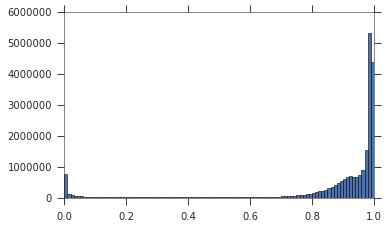

In [8]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.hist(accessibility_array['coverage']/2512, bins=100)

In [10]:
np.min(accessibility_array['coverage'])

0

In [25]:
def calc_pct_genome_accessible(accessibility_array=accessibility_array, number_of_samples=2512,
                               proportion_of_samples=0.8):
    return(np.sum(accessibility_array['coverage'] > number_of_samples * proportion_of_samples) / len(accessibility_array['coverage']))

In [28]:
for proportion_of_samples in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]:
    print("%% genome acessible in %4.2f of samples = %5.3f" % (
            proportion_of_samples,
            calc_pct_genome_accessible(proportion_of_samples=proportion_of_samples)
    ))

% genome acessible in 0.50 of samples = 0.902
% genome acessible in 0.60 of samples = 0.891
% genome acessible in 0.70 of samples = 0.875
% genome acessible in 0.80 of samples = 0.835
% genome acessible in 0.90 of samples = 0.694
% genome acessible in 0.95 of samples = 0.548


In [11]:
np.sum(accessibility_array['coverage'] > 2512 * 0.8) / len(accessibility_array['coverage'])

0.83535081178934123

In [32]:
print("By comparing different methods of variant discovery and genotype calling, \
we find that %4.1f%% of genomic positions can be reliably characterised by short-read sequencing, " %
     (calc_pct_genome_accessible(proportion_of_samples=0.8) * 100) )

By comparing different methods of variant discovery and genotype calling, we find that 83.5% of genomic positions can be reliably characterised by short-read sequencing, 


In [19]:
core_region = (etl
               .fromtsv(core_regions_fn)
               .pushheader(['chrom', 'start','end', 'region_type'])
               .convertnumbers()
               .addfield('length', lambda rec: rec[2] - rec[1])
)
print(len(core_region.data()))
core_region

110


chrom,start,end,region_type,length
Pf3D7_01_v3,0,27336,SubtelomericRepeat,27336
Pf3D7_01_v3,27336,92900,SubtelomericHypervariable,65564
Pf3D7_01_v3,92900,457931,Core,365031
Pf3D7_01_v3,457931,460311,Centromere,2380
Pf3D7_01_v3,460311,575900,Core,115589


In [22]:
sum(core_region.aggregate('region_type', sum, 'length').values('value'))

23292642

In [23]:
core_region.aggregate('region_type', sum, 'length').displayall()

region_type,value
Centromere,31922
Core,20782107
InternalHypervariable,344759
SubtelomericHypervariable,1571888
SubtelomericRepeat,561966


In [24]:
20782107/23292642

0.892217679729075